# Wprowadzenie do prawdopodobieństwa i statystyki
W tym notatniku zajmiemy się niektórymi koncepcjami, które omawialiśmy wcześniej. Wiele pojęć z zakresu prawdopodobieństwa i statystyki jest dobrze zaimplementowanych w głównych bibliotekach do przetwarzania danych w Pythonie, takich jak `numpy` i `pandas`.


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Zmienne losowe i rozkłady
Zacznijmy od wylosowania próbki 30 wartości z rozkładu jednostajnego w przedziale od 0 do 9. Obliczymy również średnią i wariancję.


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


Aby wizualnie oszacować, ile różnych wartości znajduje się w próbie, możemy narysować **histogram**:


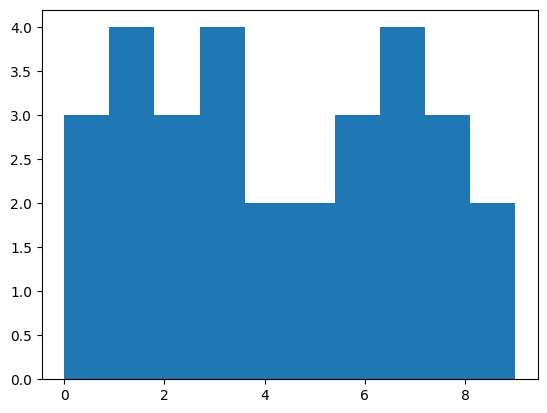

In [119]:
plt.hist(sample)
plt.show()

## Analiza rzeczywistych danych

Średnia i wariancja są bardzo ważne podczas analizy danych z rzeczywistego świata. Załadujmy dane dotyczące graczy baseballowych z [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


Używamy tutaj pakietu [**Pandas**](https://pandas.pydata.org/) do analizy danych. Więcej o Pandas i pracy z danymi w Pythonie porozmawiamy później w tym kursie.

Obliczmy średnie wartości dla wieku, wzrostu i wagi:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

Skupmy się teraz na wzroście i obliczmy odchylenie standardowe oraz wariancję:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


Oprócz średniej warto przyjrzeć się wartości mediany i kwartylom. Można je zobrazować za pomocą **wykresu pudełkowego**:


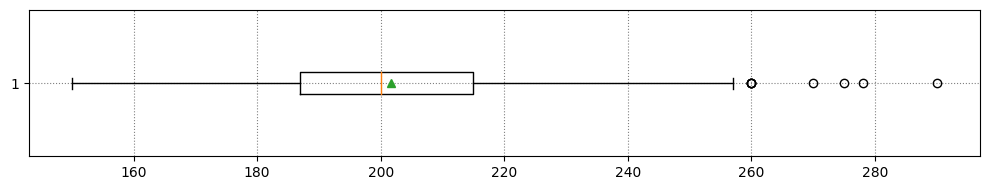

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

Możemy również tworzyć wykresy pudełkowe dla podzbiorów naszego zbioru danych, na przykład pogrupowanych według roli gracza.


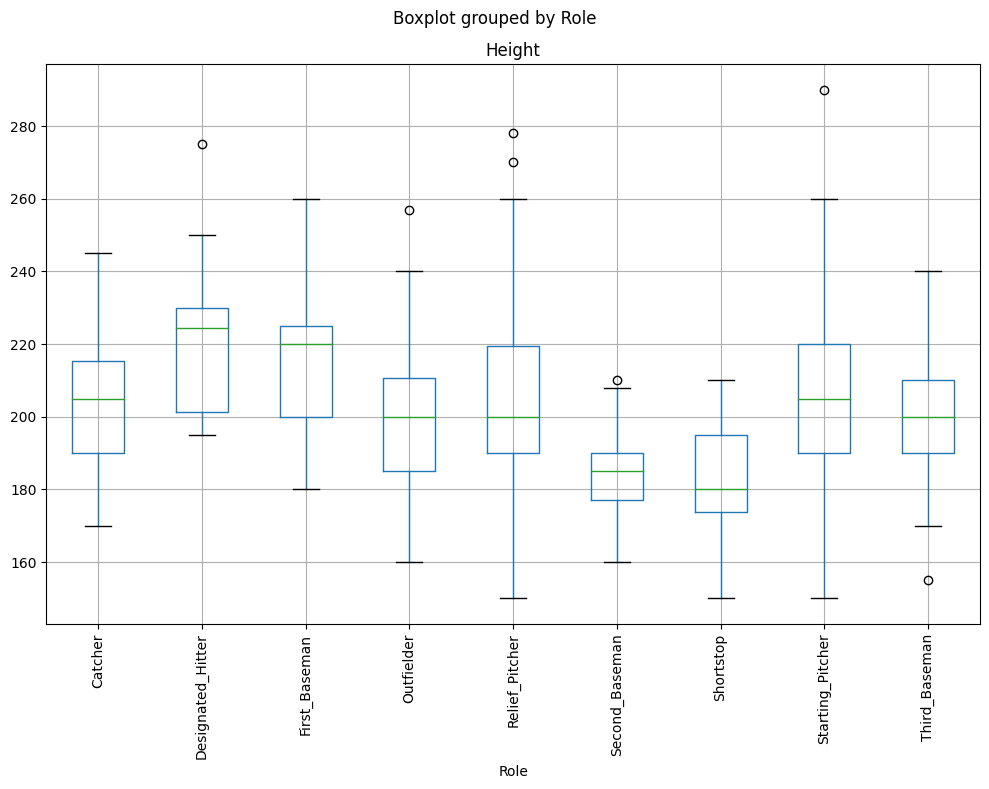

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **Uwaga**: Ten diagram sugeruje, że średnio wzrost pierwszobazowych jest wyższy niż wzrost drugobazowych. Później dowiemy się, jak można bardziej formalnie przetestować tę hipotezę i jak wykazać, że nasze dane są statystycznie istotne, aby to udowodnić.

Wiek, wzrost i waga to zmienne losowe ciągłe. Jak myślisz, jaki jest ich rozkład? Dobrym sposobem, aby się tego dowiedzieć, jest narysowanie histogramu wartości:


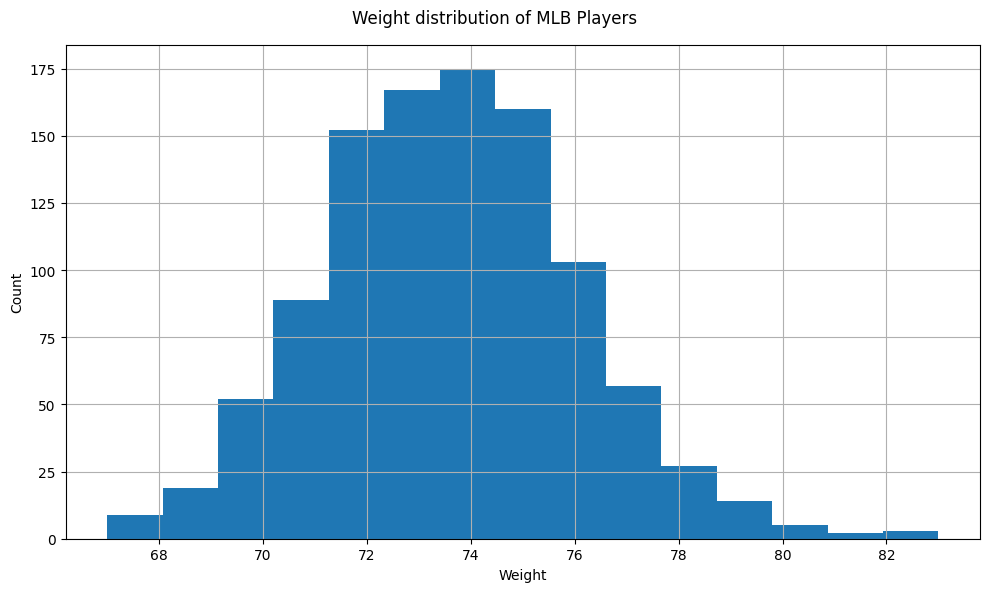

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Rozkład normalny

Stwórzmy sztuczną próbkę wag, która będzie podążać za rozkładem normalnym z taką samą średnią i wariancją jak nasze rzeczywiste dane:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

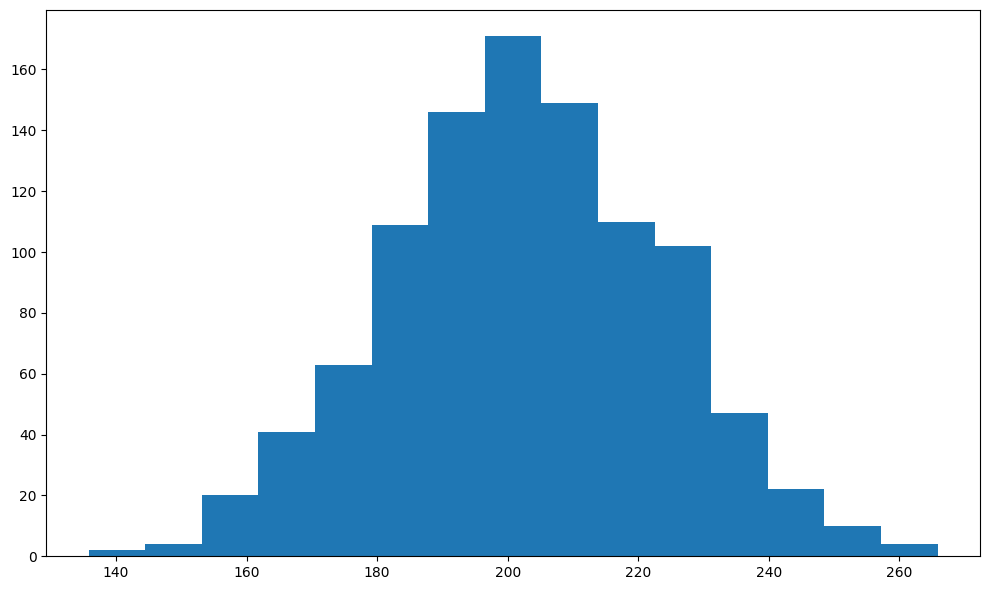

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

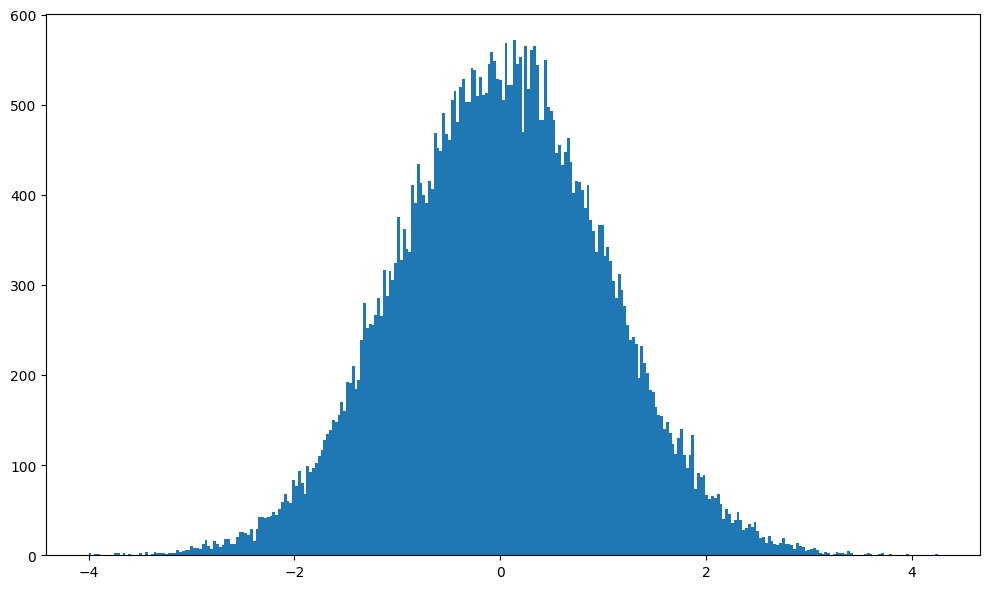

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

Ponieważ większość wartości w rzeczywistości jest rozkładem normalnym, nie powinniśmy używać generatora liczb losowych o rozkładzie jednostajnym do generowania danych próbnych. Oto, co się stanie, jeśli spróbujemy wygenerować wagi za pomocą rozkładu jednostajnego (wygenerowanego przez `np.random.rand`):


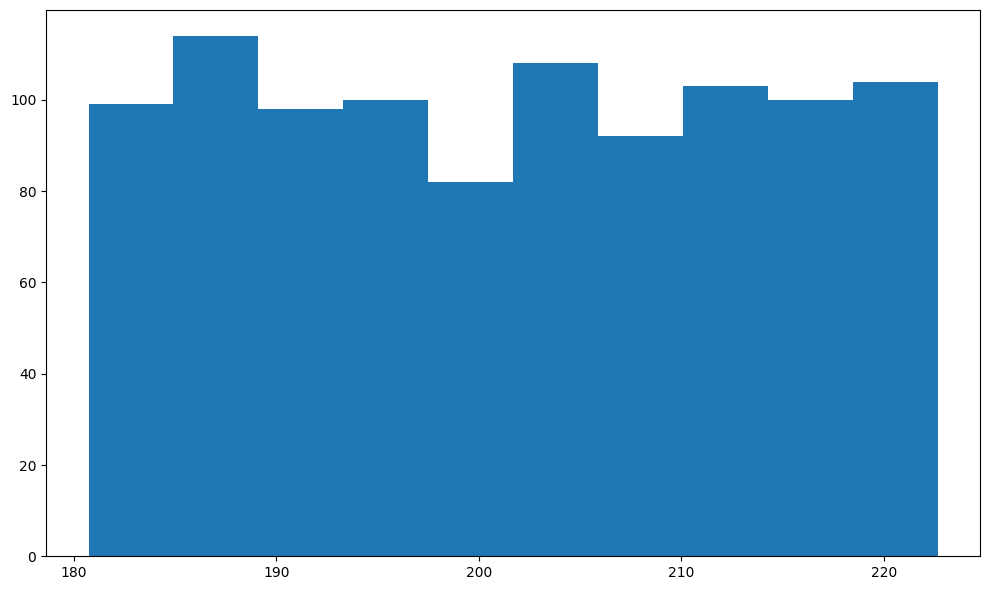

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## Przedziały ufności

Obliczmy teraz przedziały ufności dla wagi i wzrostu graczy baseballowych. Skorzystamy z kodu [z tej dyskusji na stackoverflow](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## Testowanie hipotez

Przyjrzyjmy się różnym rolom w naszym zbiorze danych o baseballistach:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


Widzimy, że przedziały się nie nakładają.

Statystycznie bardziej poprawnym sposobem na udowodnienie hipotezy jest użycie **testu t-Studenta**:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


Dwie wartości zwracane przez funkcję `ttest_ind` to:
* p-wartość można traktować jako prawdopodobieństwo, że dwie rozkłady mają tę samą średnią. W naszym przypadku jest ona bardzo niska, co oznacza, że istnieją silne dowody na to, że pierwszobazowi są wyżsi.
* t-wartość to pośrednia wartość znormalizowanej różnicy średnich, która jest używana w teście t i porównywana z wartością progową dla danego poziomu ufności.


## Symulacja rozkładu normalnego za pomocą centralnego twierdzenia granicznego

Generator pseudolosowy w Pythonie został zaprojektowany tak, aby dostarczać rozkład jednostajny. Jeśli chcemy stworzyć generator dla rozkładu normalnego, możemy skorzystać z centralnego twierdzenia granicznego. Aby uzyskać wartość o rozkładzie normalnym, wystarczy obliczyć średnią próbki wygenerowanej w sposób jednostajny.


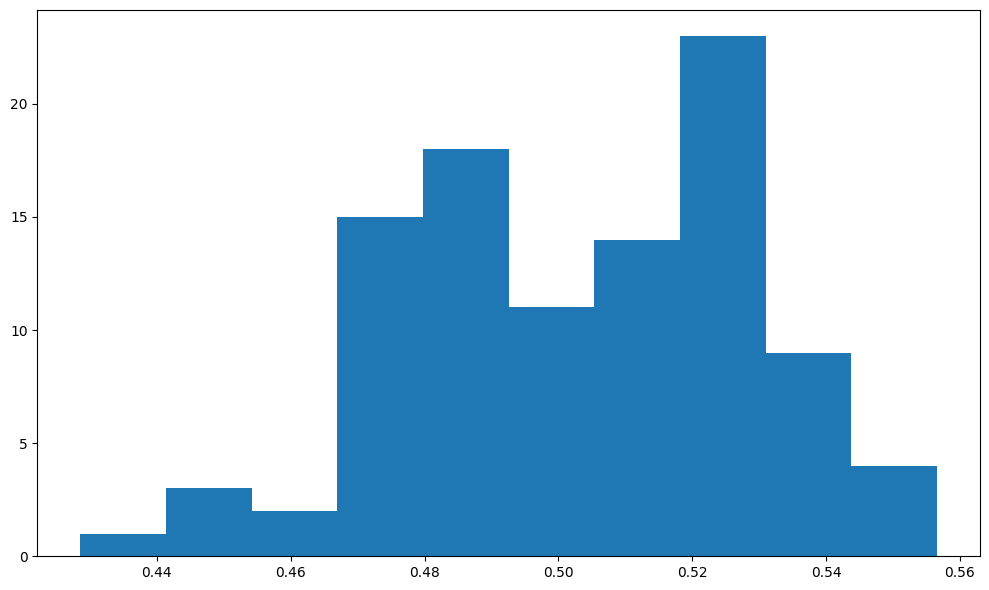

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## Korelacja i Zła Korporacja Baseballowa

Korelacja pozwala nam znaleźć zależności między sekwencjami danych. W naszym przykładzie zabawowym załóżmy, że istnieje zła korporacja baseballowa, która płaci swoim graczom w zależności od ich wzrostu – im wyższy gracz, tym więcej zarabia. Załóżmy, że istnieje podstawowa pensja w wysokości 1000 dolarów oraz dodatkowy bonus od 0 do 100 dolarów, w zależności od wzrostu. Weźmiemy prawdziwych graczy z MLB i obliczymy ich wyimaginowane pensje:


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


Obliczmy teraz kowariancję i korelację tych sekwencji. `np.cov` zwróci tzw. **macierz kowariancji**, która jest rozszerzeniem kowariancji na wiele zmiennych. Element $M_{ij}$ macierzy kowariancji $M$ to korelacja między zmiennymi wejściowymi $X_i$ i $X_j$, a wartości diagonalne $M_{ii}$ to wariancja $X_{i}$. Podobnie, `np.corrcoef` zwróci **macierz korelacji**.


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


Korelacja równa 1 oznacza, że istnieje silna **liniowa zależność** między dwiema zmiennymi. Możemy wizualnie zobaczyć liniową zależność, rysując jedną wartość względem drugiej:


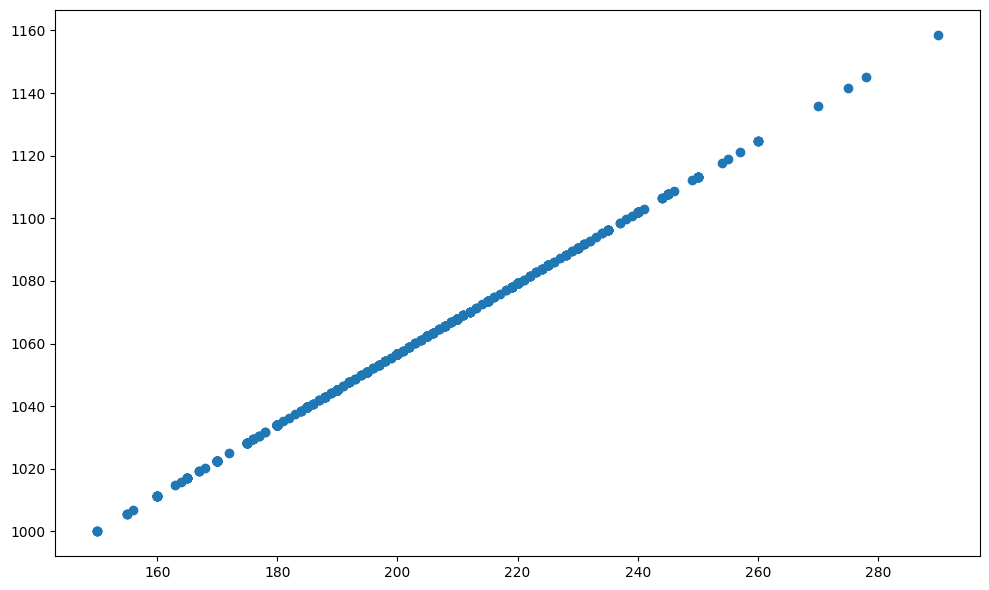

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


W tym przypadku korelacja jest nieco mniejsza, ale nadal dość wysoka. Teraz, aby uczynić zależność jeszcze mniej oczywistą, możemy dodać trochę dodatkowej losowości, dodając jakąś zmienną losową do wynagrodzenia. Zobaczmy, co się stanie:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


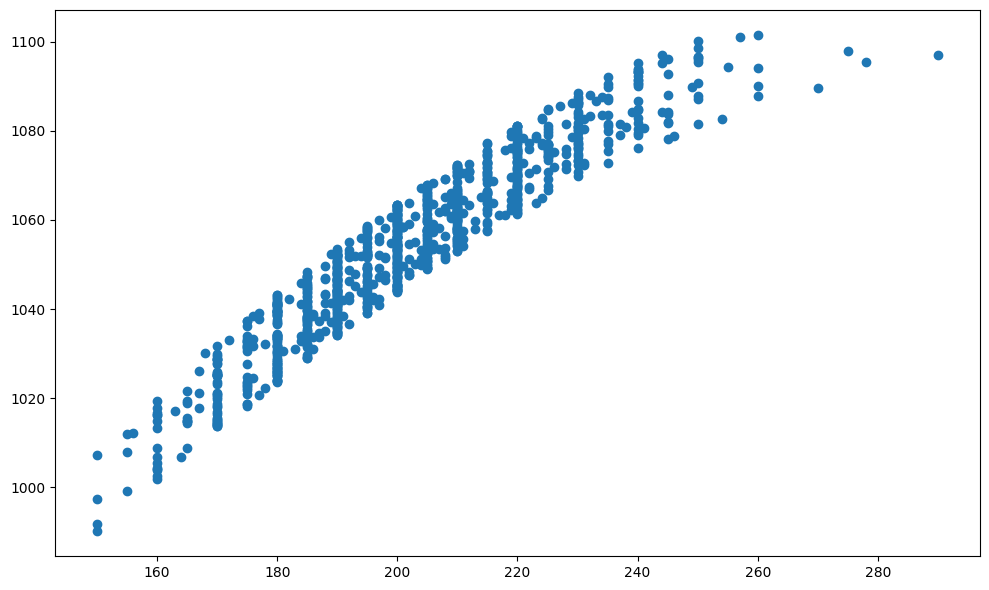

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> Czy możesz zgadnąć, dlaczego kropki układają się w takie pionowe linie?

Zaobserwowaliśmy korelację pomiędzy sztucznie skonstruowaną zmienną, taką jak pensja, a obserwowaną zmienną *wzrost*. Sprawdźmy teraz, czy dwie obserwowane zmienne, takie jak wzrost i waga, również są ze sobą skorelowane:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

Niestety, nie uzyskaliśmy żadnych wyników - tylko dziwne wartości `nan`. Wynika to z faktu, że niektóre wartości w naszej serii są niezdefiniowane, reprezentowane jako `nan`, co powoduje, że wynik operacji również jest niezdefiniowany. Patrząc na macierz, możemy zauważyć, że problematyczną kolumną jest `Weight`, ponieważ autokorelacja między wartościami `Height` została obliczona.

> Ten przykład pokazuje, jak ważne są **przygotowanie danych** i **ich oczyszczenie**. Bez odpowiednich danych nie możemy niczego obliczyć.

Użyjmy metody `fillna`, aby uzupełnić brakujące wartości i obliczyć korelację:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

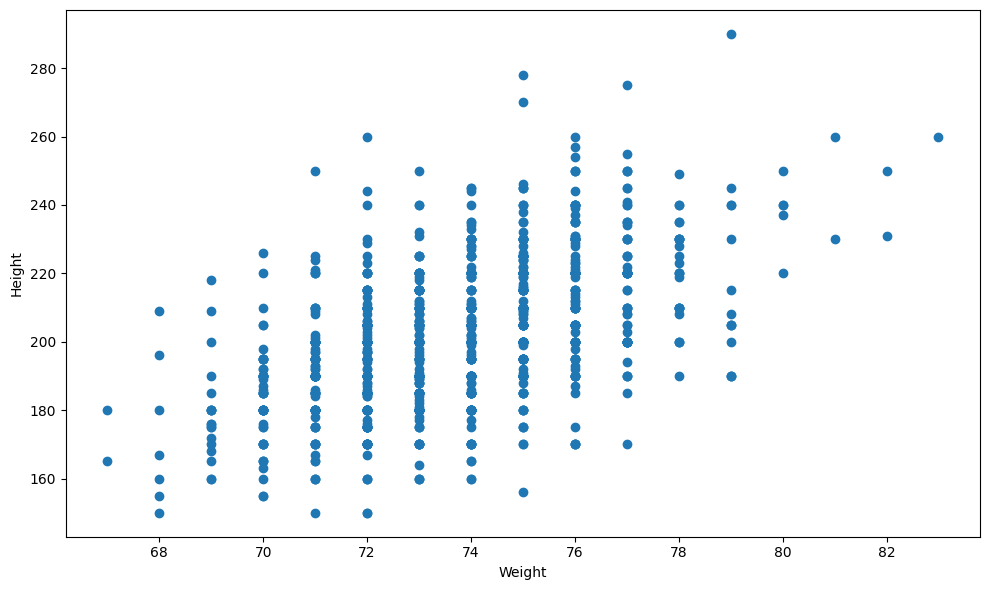

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## Podsumowanie

W tym notatniku nauczyliśmy się, jak wykonywać podstawowe operacje na danych w celu obliczania funkcji statystycznych. Teraz wiemy, jak korzystać z solidnego aparatu matematyki i statystyki, aby udowadniać pewne hipotezy oraz jak obliczać przedziały ufności dla dowolnych zmiennych na podstawie próbki danych.



---

**Zastrzeżenie**:  
Ten dokument został przetłumaczony za pomocą usługi tłumaczeniowej AI [Co-op Translator](https://github.com/Azure/co-op-translator). Chociaż dokładamy wszelkich starań, aby tłumaczenie było precyzyjne, prosimy pamiętać, że automatyczne tłumaczenia mogą zawierać błędy lub nieścisłości. Oryginalny dokument w jego rodzimym języku powinien być uznawany za wiarygodne źródło. W przypadku informacji krytycznych zaleca się skorzystanie z profesjonalnego tłumaczenia wykonanego przez człowieka. Nie ponosimy odpowiedzialności za jakiekolwiek nieporozumienia lub błędne interpretacje wynikające z korzystania z tego tłumaczenia.
